In [2]:
import pandas as pd
import numpy as np
from pyanp import priority 

In [3]:
mat1 = priority.get_matrix("mat1.xlsx")  # Imports simple pairwise actor comparisons on differing criteria

In [4]:
mat1

array([[1.        , 0.33333333, 0.14285714, 0.5       ],
       [3.        , 1.        , 0.11111111, 3.        ],
       [7.        , 9.        , 1.        , 9.        ],
       [2.        , 0.33333333, 0.11111111, 1.        ]])

In [5]:
priority.pri_eigen(mat1)   # Pairwise Priority matrix 

array([0.05750144, 0.14488138, 0.72338425, 0.07423294])

#### Calculate the Eigenvalues

In [6]:
priority.pri_eigen(mat1, return_eigenval=True)

4.282541609285509

In [7]:
priority.incon_std(mat1)  # Inconsistency measure

0.1058208274477563

#### Calculate the Eigenvector

In [8]:
priority.pri_eigen(mat1)    # Original Eigenvector

array([0.05750144, 0.14488138, 0.72338425, 0.07423294])

In [9]:
priority.pri_expeigen(mat1)     # Exponential Eigenvector Calc

array([0.08516773, 0.10002445, 0.73546142, 0.0793464 ])

In [11]:
priority.pri_llsm(mat1)      # Geometric Mean of Columns

array([0.05781584, 0.14718351, 0.71821576, 0.07678488])

In [13]:
e_vec = pd.DataFrame(priority.pri_llsm(mat1))


In [14]:
e_vec

,0
0,0.057816
1,0.147184
2,0.718216
3,0.076785


In [21]:
e_vec.columns = ["Weights"]
e_vec.rename(index={0:"BioStress", 1:"GDP", 2:"Public Health", 3:"Sunk Costs"}, inplace=True)

In [22]:
e_vec

,Weights
BioStress,0.057816
GDP,0.147184
Public Health,0.718216
Sunk Costs,0.076785


# Run AHP

### Create new excel file with all actors' priorities inputed & alternatives ranked

In [83]:
! pip install pyanp
import pyanp.ahptree as ahptree


In [84]:
%pylab inline
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [85]:
pylab.rcParams['figure.figsize'] = (12, 7.5)

In [115]:
excel_file = 'AHPTreeData_2.xlsx'
ahp = ahptree.ahptree_fromdf(excel_file)
ahp

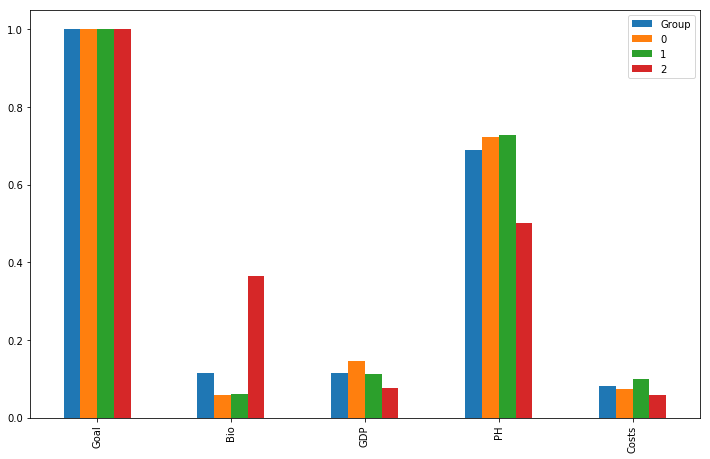

In [116]:
gs = ahp.global_priority_table()
gs.plot(kind="bar")

### Criteria C which is Public health is the most important, Actor C (no.2) is the extreme green activist- highly prizes Biostress (A) and Public Health (C)

In [117]:
gs

,Group,0,1,2
Goal,1.000000,1.000000,1.000000,1.000000
Bio,0.115750,0.057501,0.059950,0.364025
GDP,0.114126,0.144881,0.112806,0.075382
PH,0.690075,0.723384,0.728763,0.502014
Costs,0.080050,0.074233,0.098481,0.058580


In [118]:
type(gs)

pandas.core.frame.DataFrame

In [119]:
gs.columns = ["Grp", "Actor A", "Actor B", "Actor C"]

gs.rename(index={0: " ", 1:"BioStress", 2:"GDP", 3:"Public Health", 4:"Sunk Costs"}, inplace=True)

In [120]:
gs

,Grp,Actor A,Actor B,Actor C
Goal,1.000000,1.000000,1.000000,1.000000
Bio,0.115750,0.057501,0.059950,0.364025
GDP,0.114126,0.144881,0.112806,0.075382
PH,0.690075,0.723384,0.728763,0.502014
Costs,0.080050,0.074233,0.098481,0.058580


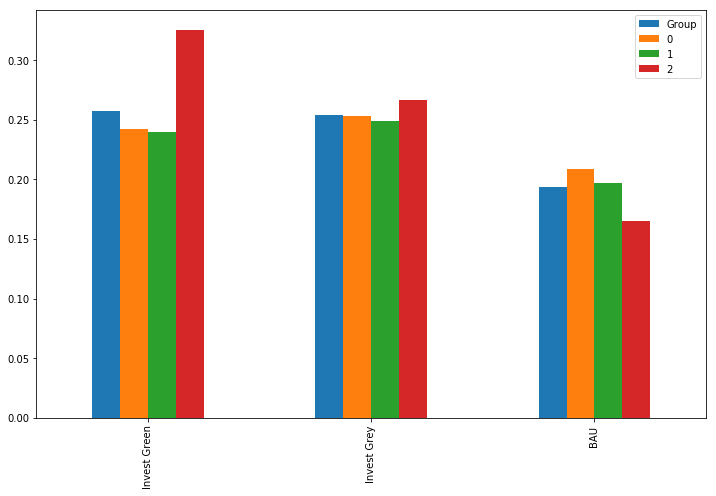

In [121]:
altscores = ahp.priority_table()
altscores.plot(kind="bar")

In [123]:
altscores

,Group,0,1,2
Invest Green,0.257221,0.242285,0.239651,0.325521
Invest Grey,0.253489,0.252696,0.248790,0.266112
BAU,0.193865,0.208789,0.197049,0.164880


,Group,0,1,2
Goal,0.054774,0.105821,0.069352,0.047475


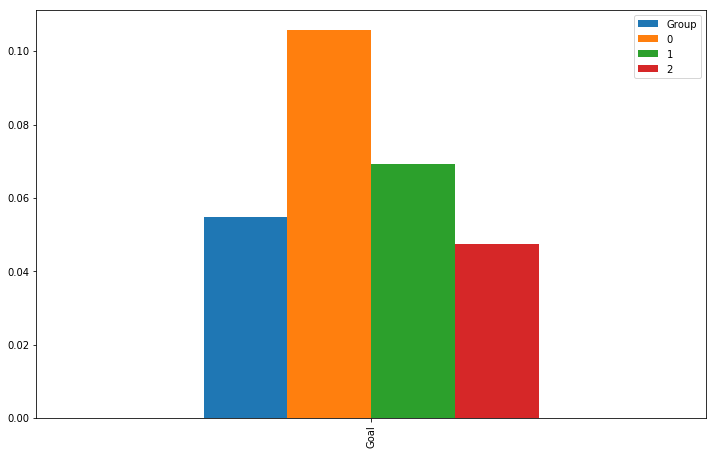

In [122]:
allincons = ahp.incond_std_table()
display(HTML(allincons.to_html().replace('\n','')))
allincons.plot(kind="bar")
plt.show()